<a href="https://colab.research.google.com/github/Eswa2020/data-prep-project/blob/master/Copy_of_Moringa_Data_Science_Core_W9_Independent_Project_2020_Esther_Waiaimu_Python_KNN_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="yellow"> **Defining the Question**

## <font color="green"> Specifying the Question

- Predict if a passenger survived the sinking of the Titanic or not.
- Predict whether an email is spam or ham.

## <font color="green"> Metric of Success

* Since both projects are classification problems, we will use:
     * Accuracy; threshold 85%
* For target class imbalance we will use 
* (harmonic mean between the positive rate (precision) and the negative rate (Recall))
     * F1 score; threhold 85%

## <font color="green"> Experimental Design Taken

 **Predicting survival in the titanic Disaster**
 * Loading the dataset
 * Exploratory Data Analysis
 * Visualization
 * Data Cleaning
 * Features Engineering
 * Modeling: K-Nearest Neighbors Classifier (KNN)
 * Hyperparameter Tuning
 * Optimization techinques for KNN 
 * Recommendations
 * Challenging the model: Random Forest Classifier
 * Conclusion

## <font color="green"> Appropriateness of the Data

**Dataset 1 links:**
* Train set: [link text](https://www.kaggle.com/c/titanic/download/train.csv)
* Test set:[link text](https://www.kaggle.com/c/titanic/download/test.csv)

The dataset contains the following fields:
* Pclass Ticket class (: 1=upper, 2=middle, 3=lower)
* Sex : Gender
* Age : Age in years (fractional for babies)
* Sibsp : Number of siblings and spouse. Sibling = brother, sister, stepbrother, stepsister.    Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: Number of parents or children aboard the ship. Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: Ticket number (a string of characters)
* Fare: Passenger fare (dollars)
* Cabin: Cabin number (a string of characters)
* Embarked: Port of embarkation (S=Southampton, Q=Queenstown (now Cobh), C=Cherbourg)

# <font color="purple"> **Reading the Data**

In [ ]:
# Importing necessary libraries
import pandas as pd 
import numpy as np

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries for data preparartion and performance measures
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

# Algorithms
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
# Loading the train dataset
data = pd.read_csv('/content/train (5).csv')
data  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Loading the test dataset
test = pd.read_csv('/content/test (1).csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


> We will not be using the test dataset because it does not have out dependent variable. 

In [ ]:
# checking the top of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# checking the bottom of the data
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From the table above: 

1. We need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.

2. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. 

3. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.


In [ ]:
# view summary information of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking for unique values 

cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cols:
  print(col)
  print(data[col].unique())
  print('\n')

Pclass
[3 1 2]


Sex
['male' 'female']


SibSp
[1 0 3 4 2 5 8]


Parch
[0 1 2 5 3 4 6]


Embarked
['S' 'C' 'Q' nan]




In [ ]:

# Statistical description of numerical columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the dataset survived the Titanic.

We can also see that the passenger ages range from 0.4 to 80.

On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

* It is clear that people from the First class had higher chances of survival.
* Pclass is therefore an important feature to predict survival

# <font color="yellow"> **Data Cleaning** 

## <font color = "green"> Cleaning the Train Dataset

In [ ]:
# checking data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Which features are:

1. **Categorical ?**
- Survived
- Sex
- Embarked

2. **Ordinal?**
- Pclass.

3. **Numerical?**
- Age (Continuous)
- Fare (Continuous)
- SibSp (Discrete)
- Parch (Discrete)

In [ ]:
#Convert the relevant data types to categorical

# Creating a list of the numerical columns in the dataset.
numeric = ['Age', 'Fare', 'SibSp', 'Parch']

categoricals = ['Survived','Pclass','Sex','Embarked']

objects = ['Name']

for x in data.columns:
   if x in numeric:
       data[x]=pd.to_numeric(data[x])
   elif x in categoricals:
        data[x]=data[x].astype('category')

In [ ]:
# encoding categorical variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data['Ticket'] = le.fit_transform(data['Ticket'])
#data['Embarked'] = le.fit_transform(data['Embarked'])

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,NaN,S


In [ ]:
#Check if features are assigned the relevant data types
data.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [ ]:
# checking for missing values 
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Embarked feature has only 2 missing values, which can easily be filled by mode.

It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values.

The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [ ]:
# replacing all missing values with the mean in the age column
data['Age'].fillna((data['Age'].mean()), inplace = True)

In [ ]:
# confirming changes
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Embarked column has 2 missing values. It's best to fill them with the most common values in that column to maintain its frequency distribution.

In [ ]:
#Replace the null values in the Embarked column with the mode

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [ ]:
# confirming changes
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
# column cabin containing categorical values 
# dropping the columns since it contains very many missing values
data.drop('Cabin', axis = 1, inplace = True)

In [ ]:
# dropping the unnecessary columns
data.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

In [ ]:
# confirming changes
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
# checking if the data set contains duplicates
data.duplicated(subset = None, keep = 'first')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
# droping the duplicated values 
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [ ]:
# checking if the data set contains duplicates
data.duplicated(subset = None, keep = 'first')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

# <font color="white"> **Checking for outliers**

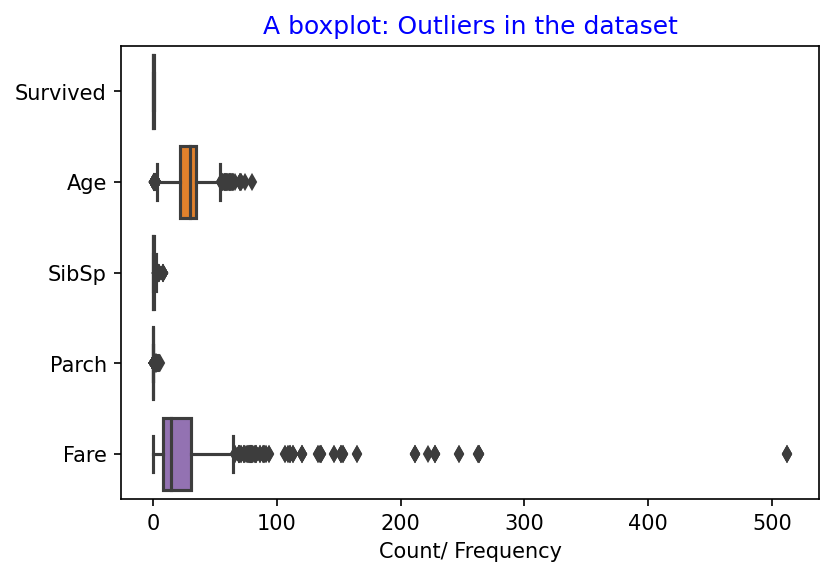

In [ ]:
# check for outliers

colm = data[[ 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
# np.asarray(colu).reshape()
# check for outliers
plt.figure(dpi = 150)
ax = sns.boxplot(data = colm , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()


In [ ]:
#***
#The Age and fare column have outliers
#Lets trying dealing with them by scaling these columns
#

data['Age1'] = [np.log(x) for x in data['Age']]

In [ ]:
df1 = data['Age1']

from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()

scaling.fit_transform(df1)

ValueError: ignored

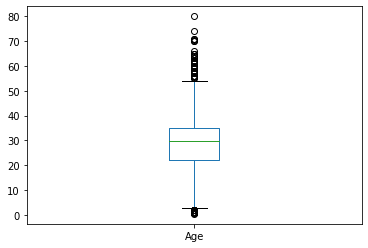

In [ ]:
data.boxplot(column = ['Age'], grid = False)

# <font color="green"> **Exploratory Data Analysis**



## <font color = "red"> Univariate Analysis

In [ ]:
#lets check the dataset description on the Age column
## train dataset
print(data['Age'].describe())
print(data['Age'].mode())

# we observe that mean age = 29.699
# median = 29.699
# mode = 29.699

## test dataset

print(test['Age'].describe())
print(test['Age'].mode())

# we observe that mean age = 30.272
# median = 30.272
# mode =for 0 is 21 and 1 is 24, 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
0    24.0
dtype: float64
count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64
0    21.0
1    24.0
dtype: float64


Text(0.5, 0, 'survived')

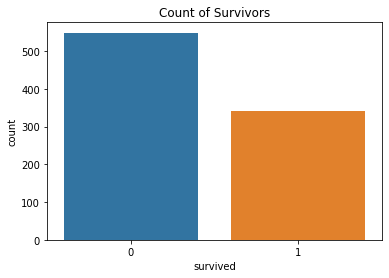

In [ ]:
#lets start by checking the number of people who survived
#
sns.countplot(x='Survived', data = data)
plt.title('Count of Survivors')
plt.ylabel('count')
plt.xlabel('survived')

In [ ]:
#lets check the actual numbers
data.Survived.value_counts()

##549 people died while 342 survived

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#lets do splitting age into  age groups 
conditions = [
    ((data.Age >= 0) & (data.Age <= 9)),
    ((data.Age >= 10) & (data.Age <= 19)),
    ((data.Age >= 20) & (data.Age <= 29)),
    ((data.Age >= 30) & (data.Age <= 39)),
    ((data.Age >= 40) & (data.Age <= 49)),
    ((data.Age >= 50) & (data.Age <= 59)),
    ((data.Age >= 60) & (data.Age <= 69)),
    ((data.Age >= 70) & (data.Age <= 80))
]
choices = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8']
#create a column that stores our new data
data['age_range'] = np.select(conditions, choices)

Text(0, 0.5, 'Count')

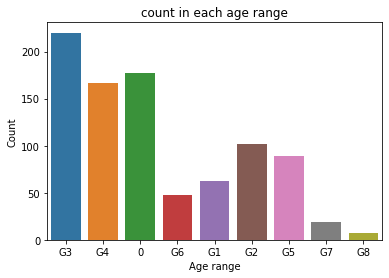

In [ ]:
#check the count in the age range
sns.countplot(x='age_range',data = data)
plt.title('count in each age range')
plt.xlabel('Age range')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

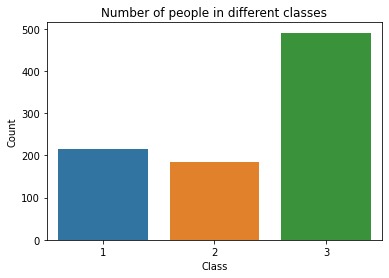

In [ ]:
#lets check the distribution of people per class
sns.countplot(x='Pclass',data = data)
plt.title('Number of people in different classes')
plt.xlabel('Class')
plt.ylabel('Count')

## <font color = "red"> Bivariate Analaysis

Text(0.5, 0, 'Pclass')

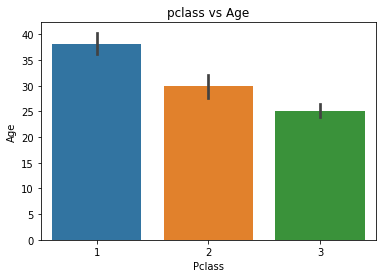

In [ ]:
#we want to compare the class and age.
sns.barplot(x='Pclass',y='Age',data = data)
plt.title('pclass vs Age')
plt.ylabel('Age')
plt.xlabel('Pclass')

Text(0.5, 0, 'Sex')

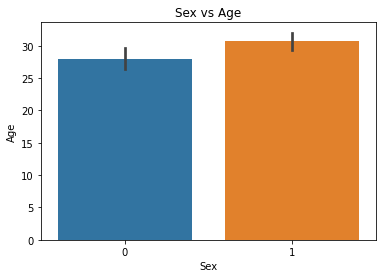

In [ ]:
#we want to compare the class and age.
sns.barplot(x='Sex',y='Age',data = data)
plt.title('Sex vs Age')
plt.ylabel('Age')
plt.xlabel('Sex')

## <font color = "red"> Multivariate Analaysis

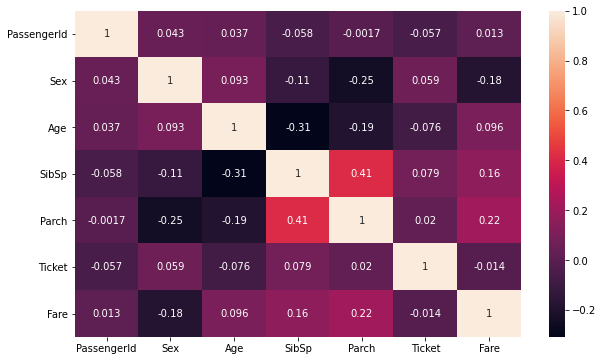

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, ax=ax);

* Survival chance of women are higher between 14 and 40
* Men have a high probability of survival when they are between 18 and 30 years old.
* In both generally infants have a little bit of higher chances of survival.
* Certain ages hava increased odds of survival.
* Creating age groups in our feature engineering may help to make every feature of the same scale.

# <font color = "purple"> **Feature Engineering**

As was stated earlier women, children and the upper class were given priority to get to safety, we therefore have to establish the title of the passengers, the size of a family or whether the passenger was onboard alone.

It is difficult to establish any information on a passenger based on their names, some are nicknames. So we try establish the title of each passenger.

In [ ]:
#Let's establish the title of each passenger

for x in data:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
#What are the titles extracted from the names ?

data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

The titles are many in number and usually we just need to establish if it's a Miss, Mrs, Mr or Master and every other title can be referred to as 'other'.

In [ ]:
for x in data:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [ ]:
#What are the titles extracted from the names?

data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

Now we can safely drop the Name column.

In [ ]:
# dropping the name column
data.drop('Name', axis=1, inplace = True)

In [ ]:
# confirming changes
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [ ]:
for x in data:
    data['FamSize'] = data['SibSp'] + data['Parch'] + 1

In [ ]:
# confirming changes
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


Was the passenger traveling alone or with a family? If the family size is 1 then they are probably alone, if there are more then the passenger is essentially not alone.

In [ ]:
for x in data:
    data['Alone?'] = 0
    data.loc[data['FamSize'] == 1, 'Alone?'] = 1

In [ ]:
data['Alone?'].unique()

array([0, 1])

Essentially;

if Alone = 0, they are not alone

if Alone = 1, they are alone.

In [ ]:
data.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize,Alone?
0,1,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,2,0



Thereafter we can drop the colums 'SibSp' and 'Parch'

In [ ]:
data = data.drop(['Parch', 'SibSp'], axis=1)

In [ ]:
data.head(1)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamSize,Alone?
0,1,0,3,male,22.0,A/5 21171,7.25,NaN,S,Mr,2,0


In [ ]:
categoricals = ['Sex','Embarked','Title']

data = pd.get_dummies(data, columns=['Sex','Embarked','Title'])

In [ ]:
data.head(2)

,PassengerId,Survived,Pclass,Age,Ticket,Fare,Cabin,FamSize,Alone?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,22.0,A/5 21171,7.2500,NaN,2,0,0,1,0,0,1,0,0,1,0,0
1,2,1,1,38.0,PC 17599,71.2833,C85,2,0,1,0,1,0,0,0,0,0,1,0


We must consider the age column, if a passenger was a child they had a higher chance of survival, therefore we must categorize a passenger as adult(1) or child(0) in a new Adult column.

In [ ]:
data["Adult"] = 0

data["Adult"][data["Age"] >= 18] = 1

#Thereafter drop the age column

data = data.drop(['Age'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data = data[['Pclass','Adult','Fare','Alone?','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Other','Survived']]
data.head()

,Pclass,Adult,Fare,Alone?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Survived
0,3,1,7.2500,0,0,1,0,0,1,0,0,1,0,0,0
1,1,1,71.2833,0,1,0,1,0,0,0,0,0,1,0,1
2,3,1,7.9250,1,1,0,0,0,1,0,1,0,0,0,1
3,1,1,53.1000,0,1,0,0,0,1,0,0,0,1,0,1
4,3,1,8.0500,1,0,1,0,0,1,0,0,1,0,0,0


# <font color="blue"> **Modelling**


## <font color = "red"> K-Nearest Neighbors 

In [ ]:
# split into train and test sets
# define our X and y

X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [ ]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state = 42)

In [ ]:
print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (712, 14)
Shape of the y_train:  (712,)
Shape of the X_test:  (179, 14)
Shape of the y_test:  (179,)


In [ ]:
#Perform the K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

[[89 16]
 [19 55]]
The accuracy : 0.8044692737430168


Let us repeat the step using 70% training data and 30% test data.

In [ ]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split (X,y,test_size = 0.3,random_state = 42)

In [ ]:
print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (623, 14)
Shape of the y_train:  (623,)
Shape of the X_test:  (268, 14)
Shape of the y_test:  (268,)


In [ ]:
#Perform the K-Nearest Neighbors Classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

[[136  21]
 [ 32  79]]
The accuracy : 0.8022388059701493


Let's use 60% training data and 40% test data.

In [ ]:
# train and test splits
X_train, X_test,y_train,y_test = train_test_split (X,y,test_size = 0.4,random_state = 42)

In [ ]:
print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (534, 14)
Shape of the y_train:  (534,)
Shape of the X_test:  (357, 14)
Shape of the y_test:  (357,)


In [ ]:
#Perform the K-Nearest Neighbors Classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       216
           1       0.76      0.68      0.72       141

    accuracy                           0.79       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.79      0.79      0.78       357

[[185  31]
 [ 45  96]]
The accuracy : 0.7871148459383753


### <font color = cyan> Hyperparameter Tuning

Parameters to tune in KNN

* k's
* Distance Metric
* Weights

### <font color = cyan> Optimize the K-Nearest Neighbors Classifier

we can optimize KNN by:
* Dimensionality Reduction with Linear Discriminant Analysis
* Rescaling our data which makes the distance metric more meaningful. 
* Changing the distance **metric** for different applications.
* Implementing weighted voting
* Applying appropriate nearest-neighbor techniques

In [ ]:
# Splitting the data into features and target variable

X = data.iloc[:, :-1]
y = data.iloc[:,-1]


# Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
          
kfold = KFold(n_splits = 5, random_state = 10)  # specifying number of folds for cross validation
        
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = -1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}

Using the Best parameters to assess the best split KNN model (80,20)

In [ ]:
# Splitting the data into features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)


# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Instantiating our model
# Using our best parameters using random search
knc = KNeighborsClassifier(metric = 'euclidean', n_neighbors= 8, weights = 'uniform')

# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))


0.8379888268156425


[[105  12]
 [ 17  45]]


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       117
           1       0.79      0.73      0.76        62

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


### try uisng 70 and 30

In [ ]:
# Splitting the data into features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)


# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Instantiating our model
# Using our best parameters using random search
knc = KNeighborsClassifier(metric = 'euclidean', n_neighbors= 8, weights = 'uniform')

# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))


0.8432835820895522


[[159  15]
 [ 27  67]]


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       174
           1       0.82      0.71      0.76        94

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


### try and use 60 and 40

In [ ]:
# Splitting the data into features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 10)


# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Instantiating our model
# Using our best parameters using random search
knc = KNeighborsClassifier(metric = 'euclidean', n_neighbors= 8, weights = 'uniform')

# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))


0.803921568627451


[[196  33]
 [ 37  91]]


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       229
           1       0.73      0.71      0.72       128

    accuracy                           0.80       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.80      0.80      0.80       357



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


* There is great improvement in our tuned model.
* The wrongly classified classes actually reduced significantly.
* Interprating the confusion matrix:
* The first row is about the not-survived-predictions:
     * 104 passengers were correctly classified as not survived (called true negatives) 
     * 13 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 17 passengers where wrongly classified as survived (false negatives) and
     * 45 were correctly classified as survived (true positives).
     
* The F1 score = 87%, Recall= 89% & Precision = 86% also improved greatly
* Our model predicts 86% of the time, a passengers survival correctly (precision).
* The recall tells us that it predicted the survival of 89% of the people who actually survived.

Predict the scores using KNearestNeighbors (KNN) with GridSearchCV

In [ ]:
model = KNeighborsClassifier()
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(model, k_grid, cv=10, scoring = 'precision')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00091379, 0.00070493, 0.00072525, 0.0007236 , 0.00069759,
        0.00070395, 0.00072691, 0.0007406 , 0.00076225, 0.00071185,
        0.00070951, 0.00068421, 0.00084434, 0.00069346, 0.00070779,
        0.00076833, 0.00075209, 0.00079198]),
 'mean_score_time': array([0.00358574, 0.00159538, 0.00316882, 0.0015749 , 0.00326931,
        0.00156338, 0.00330317, 0.00171516, 0.00328317, 0.00162117,
        0.00324659, 0.00163281, 0.00357623, 0.00162234, 0.00321372,
        0.00188332, 0.00331094, 0.00169826]),
 'mean_test_score': array([0.72285174, 0.72285174, 0.86448425, 0.79118686, 0.74754323,
        0.77219298, 0.80732275, 0.79898271, 0.80272057, 0.80075928,
        0.82418186, 0.80836389, 0.79643269, 0.8056465 , 0.83199276,
        0.80836389, 0.81085981, 0.81283758]),
 'param_n_neighbors': masked_array(data=[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    Fal

In [ ]:
print ("Best Score: ",str(grid.best_score_))

Best Score:  0.8644842498402869


In [ ]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'n_neighbors': 2, 'weights': 'uniform'}


In [ ]:
print ("Best Estimators: ",str(grid.best_estimator_))

Best Estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


In [ ]:
#Predict scores

y_pred = grid.predict(X_test)

In [ ]:
#Calculate Accuracy

print('The accuracy :',accuracy_score(y_pred,y_test))

The accuracy : 0.7759103641456583


In [ ]:
# Calculate precision, recall, and fbeta_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       229
           1       0.73      0.59      0.66       128

    accuracy                           0.78       357
   macro avg       0.76      0.74      0.74       357
weighted avg       0.77      0.78      0.77       357



A larger dataset would result in a higher level of accuracy.

## <font color = red> Challenging the solution 

### <font color = cyan> Cleaning the Test Dataset

In [ ]:
# checking data types
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#Convert the relevant data types to categorical

# Creating a list of the numerical columns in the dataset.
numeric = ['Age', 'Fare', 'SibSp', 'Parch']

categoricals = ['Pclass','Sex','Embarked']

objects = ['Name']

for x in test.columns:
   if x in numeric:
       test[x]=pd.to_numeric(test[x])
   elif x in categoricals:
        test[x]=test[x].astype('category')

In [ ]:
test.dtypes

PassengerId       int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# replacing all missing values with the mean in the age column
test['Age'].fillna((test['Age'].mean()), inplace = True)

In [ ]:
# column cabin containing categorical values 
# dropping the columns since it contains very many missing values
test.drop('Cabin', axis = 1, inplace = True)

In [ ]:
#Replace the null values in the Embarked column with the mode

test['Fare'].fillna(test['Fare'].mode()[0], inplace = True)

In [ ]:
# dropping the unnecessary columns
test.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

In [ ]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### <font color = cyan> Feature Engineering for Test Set

In [ ]:
#Let's establish the title of each passenger

for x in test:
    test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
#What are the titles extracted from the names ?
test.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [ ]:
for x in test:
    test['Title'] = test['Title'].replace(['Col', 'Dr', 'Rev', 'Sir', 'Dona'], 'Other')

    test['Title'] = test['Title'].replace('Mlle', 'Miss')
    test['Title'] = test['Title'].replace('Ms', 'Miss')
    test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [ ]:
#What are the titles extracted from the names?

test.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [ ]:
# dropping the name column
test.drop('Name', axis=1, inplace = True)

In [ ]:
test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs


In [ ]:
for x in test:
    test['FamSize'] = test['SibSp'] + test['Parch'] + 1

In [ ]:
for x in test:
    test['Alone?'] = 0
    test.loc[test['FamSize'] == 1, 'Alone?'] = 1

In [ ]:
test['Alone?'].unique()

array([1, 0])

In [ ]:
test = test.drop(['Parch', 'SibSp', 'FamSize'], axis=1)

In [ ]:
categoricals = ['Sex','Embarked','Title']

test = pd.get_dummies(test, columns=['Sex','Embarked','Title'])

In [ ]:
test.head(4)

,Pclass,Fare,Alone?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Adult
0,3,7.8292,1,0,1,0,1,0,0,0,1,0,0,1
1,3,7.0000,0,1,0,0,0,1,0,0,0,1,0,1
2,2,9.6875,1,0,1,0,1,0,0,0,1,0,0,1
3,3,8.6625,1,0,1,0,0,1,0,0,1,0,0,1


In [ ]:
test["Adult"] = 0

test["Adult"][test["Age"] >= 18] = 1

#Thereafter drop the age column

test = test.drop(['Age'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
test.columns

Index(['Pclass', 'Fare', 'Alone?', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Adult'],
      dtype='object')

In [ ]:
test = test[['Pclass','Adult','Fare','Alone?','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Other']]
test.head()

,Pclass,Adult,Fare,Alone?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,1,7.8292,1,0,1,0,1,0,0,0,1,0,0
1,3,1,7.0000,0,1,0,0,0,1,0,0,0,1,0
2,2,1,9.6875,1,0,1,0,1,0,0,0,1,0,0
3,3,1,8.6625,1,0,1,0,0,1,0,0,1,0,0
4,3,1,12.2875,0,1,0,0,0,1,0,0,0,1,0


### <font color = cyan> Random Forest Classifier

* Using Random Forest which is an Ensemble algorithm.
* Also considering the Train data without splitting it further.

In [ ]:
# Splitting the data into test and train sets as provided earlier
# NOTE: No further split is done.

X_train = data.iloc[:, :-1]
y_train = data.iloc[:,-1]
X_test = test.copy()

# Instantiating our model
# Training the model
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=10,
                                       n_jobs=-1) #  Whether to use out-of-bag samples to estimate the generalization accuracy.
random_forest.fit(X_train, y_train)

# Making predictions
y_prediction = random_forest.predict(X_test)

# Evaluating the model
random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

# Generating cross-validated estimates for each input data point
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)


print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

88.44 %
[[483  66]
 [ 99 243]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       549
           1       0.79      0.71      0.75       342

    accuracy                           0.81       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891



* The Random Forest Classifier model yields 89% accuracy.

* This is a better model compared to KNN.
* However, tunning may be needed to assess the model adequately.

* The Recall score increased compared to other models.

* Interprating the confusion matrix:
* The first row is about the not-survived-predictions:
     * 479 passengers were correctly classified as not survived (called true negatives) 
     * 70 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 94 passengers where wrongly classified as survived (false negatives) and
     * 248 were correctly classified as survived (true positives).
     

## <font color = red> Recommendation

**From the analysis: Tuning and Optimizing the KNN model is highly recommended to improve the performance of the model.**

## <font color = red> Conclusion


* From the analysis: Tuning and Optimizing the KNN model is highly recommended to improve the performance of the model.
* Splitting the data into 70,30 train and test sets was the best in the Titanic dataset.